# STATISTICAL ANALYSIS OF PATIENTS DURING COVID-19 OUTBREAK IN MEXICO
# -----------------------------------------------------------------------------------------------------------

# INTRODUCTION 

**Population of Mexico:** 129,036,569 as of Thursday, July 30 based on United Nations data.

**Sample size:** 100041

**Latitude of Mexico:** 23.634501

**Longitude of Mexico:** -102.552784

# Dataset characteristics 
 - The CoordMunicipios.csv and CoordEstados.csv files (called as dfm and dfe dataframes, respectively) include geographical information about the states and cities through Mexico (latitude and longitude) for later plotting in maps using follium library.
 - The 200504COVID19MEXICO.csv file is the main dataset including all the patients details by state.

The main .csv file (df) has a total of 100041 entries (or patients) and 35 colums (or characteristics). The 35 colums can be organised in 3 groups (Personal information about the patient, medical information, medical requirements and outcome):
 
**1.Personal information:**
ORIGEN/ENTIDAD_NAC/ENTIDAD_RES/MUNICIPIO_RES/SECTOR/SEXO/EDAD/NACIONALIDAD/HABLA_LENGUA_INDIGMIGRANTE/PAIS_NACIONALIDAD/PAIS_ORIGEN.
Note: The data has been registered anonymously, instead a unique ID_REGISTRO (ID number) was given for each patient. 

**2.Their medical information with risk factors such as:**
NEUMONIA/EDAD/EMBARAZO/ENTIDAD_RES/MUNICIPIO_RES/DIABETES/EPOC/ASMA/INMUSUPR/HIPERTENSION/CARDIOVASCULAR/OBESIDAD/RENAL_CRONICA/TABAQUISMO/OTRA_COM

**3.Medical requirements and outcome (only first aid requirements, hospitalization requirements and in last term, date of death):**
 TIPO_PACIENTE/ENTIDAD_UM/FECHA_INGRESO/FECHA_SINTOMAS/FECHA_DEF/INTUBADO/UCI/RESULTADO

# Topics addresed by the anlysis:
The analysis give insight to the following topics:
- Analysis of COVID cases
     - According to age and sex 
     - According to factor risks 
- Analysis  of the outcome and dangers of COVID
     - Number of total deaths 
     - Mean time passed from the 1st symptoms to death
- Geographical distribution of the COVID in Mexico 

# Main conclusions:

**- Analyses of the COVID cases:**
   - According to age and sex:
    - It seems that there is not a significant difference between sex(fig1,fig2). 
    - For both sex the COVID+ cases remain from 40 to 60 years old(fig1).
    - For both sex the COVID- cases remain from the 30 to 40 years old(fig1).
    - There is a lightly higher proportion of COVID+ woman from 20 to 60, but from the age of 60 there is a higher proportion of COVID+ men (fig1).
    - 60 seems to be a key age for men to be targeted by the COVID (fig1,fig2).
    - In line with the distribution of COVID+/- test results, there is higher percentage of death woman dying from 30 to 60 years old, while from 60 there is an increase in the number of deaths in men(fig2).
    - The correlation test show(fig3): 
         - The Sex is not well correlated with the test result or the hospital requirments.
         - The Age is more correlated than the Sex with the test result, but with a correlation of 0.3.
         - The need of Intensive Care with the need of Artificial Respiratory Supports has a correlation of 0.6.
    - According to factor risks:
     - Most of the population who died has 1 or 3 risk factor.
     -The most common factor risks abmong the population who died were: Hipertension(27.66%), Diabetes(25.86%), Obesity(16.94%) and Tabaquism(6.66%).
     
    
**- Conclusions of the analysis of the outcome and dangers of COVID:**    
- The COVID outbreak seems to have started the 26th of March in Mexico (fig 7).
- There has been a total acumulation of deaths of 3580 as to the 4th of May of 2020 (fig 7).
- The mean time between having the first symptoms and death is around 9 days.


**- Geographical distribution of the COVID in Mexico**
- From all Mexico the least affected city is Benito Juarez (85% of its population was not affected) with a huge difference with the rest of less infected cities (only having a 0.52% of their population not affected).
- Benito Juarez can be ranked as the savest mexican city from COVID outbreak and Alvaro Obregon as the most dangerous.
- Maps:
     - Visualization of COVID+ patients along mexican territory.
     - Visulazation of deaths along mexican territory.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
from datetime import datetime

In [51]:
#Import .csv files 
dfm = pd.read_csv("CoordMunicipios.csv", encoding = "ISO-8859-1")
dfe = pd.read_csv("CoordEstados.csv", encoding = "ISO-8859-1")
df = pd.read_csv("200504COVID19MEXICO.csv", encoding = "ISO-8859-1")
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100041 entries, 0 to 100040
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  100041 non-null  object
 1   ID_REGISTRO          100041 non-null  object
 2   ORIGEN               100041 non-null  int64 
 3   SECTOR               100041 non-null  int64 
 4   ENTIDAD_UM           100041 non-null  int64 
 5   SEXO                 100041 non-null  int64 
 6   ENTIDAD_NAC          100041 non-null  int64 
 7   ENTIDAD_RES          100041 non-null  int64 
 8   MUNICIPIO_RES        100041 non-null  int64 
 9   TIPO_PACIENTE        100041 non-null  int64 
 10  FECHA_INGRESO        100041 non-null  object
 11  FECHA_SINTOMAS       100041 non-null  object
 12  FECHA_DEF            100041 non-null  object
 13  INTUBADO             100041 non-null  int64 
 14  NEUMONIA             100041 non-null  int64 
 15  EDAD                 100041 non-nu

In [3]:
#Replace unknown data 
df=df.replace(98,np.nan)
df=df.replace(99,np.nan)
df=df.replace(97,np.nan)
df=df.replace(2,0)
#df=df.replace(3,np.nan)

# 1.  Analysis of COVID cases 
##   1.1. According to age and sex (fig 1, fig2, fig3)

### Fig 1: Distribution of positive and negative cases among men and women by age

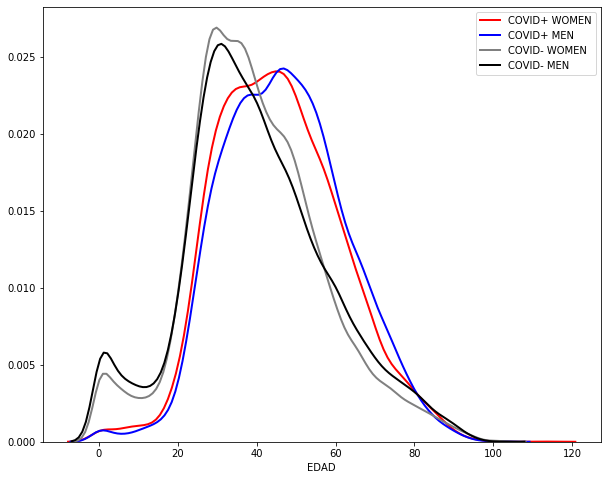

In [4]:
df4 = df[df["RESULTADO"]==1]
df5 = df[df["RESULTADO"]==0]

plt.subplots(figsize=(10,8))
sns.distplot(df4[df4["SEXO"]==1].EDAD, hist = False, kde_kws={"color": "r", "lw": 2, "label": "COVID+ WOMEN"})
sns.distplot(df4[df4["SEXO"]==0].EDAD, hist = False, kde_kws={"color": "b", "lw": 2, "label": "COVID+ MEN"})
sns.distplot(df5[df5["SEXO"]==1].EDAD,hist = False,kde_kws={"color": "grey", "lw": 2, "label": "COVID- WOMEN"})
sns.distplot(df5[df5["SEXO"]==0].EDAD,hist = False,kde_kws={"color": "black", "lw": 2, "label": "COVID- MEN"})

### Fig 2: Distribution of the number of people who died and got cured among men and women by age

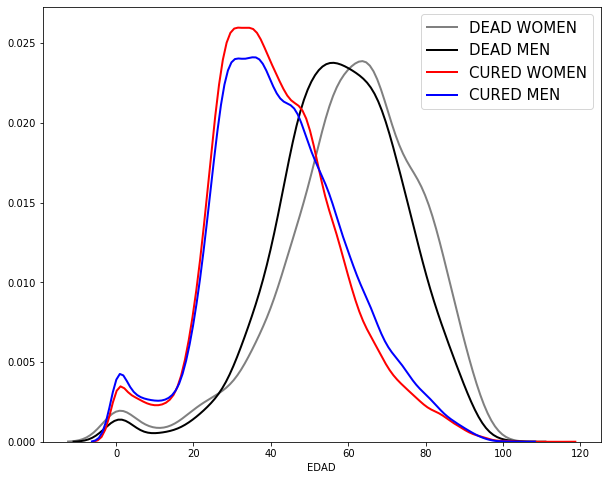

In [5]:
df2 = df[df["FECHA_DEF"]!="9999-99-99"]
df3 = df[df["FECHA_DEF"]=="9999-99-99"]
plt.subplots(figsize=(10,8))
plt.rcParams.update({'font.size': 15})
sns.distplot(df2[df2["SEXO"]==1].EDAD,hist = False, kde_kws={"color": "grey", "lw": 2, "label": "DEAD WOMEN"})
sns.distplot(df2[df2["SEXO"]==0].EDAD,hist = False, kde_kws={"color": "k", "lw": 2, "label": "DEAD MEN"})
sns.distplot(df3[df3["SEXO"]==1].EDAD,hist = False, kde_kws={"color": "r", "lw": 2, "label": "CURED WOMEN"})
sns.distplot(df3[df3["SEXO"]==0].EDAD,hist = False, kde_kws={"color": "b", "lw": 2, "label": "CURED MEN"})

### Fig 3: Level of correlation between the Age and Sex of the patients with the final COVID result (Test result, Intensive care and the need of artificial respiratory support )

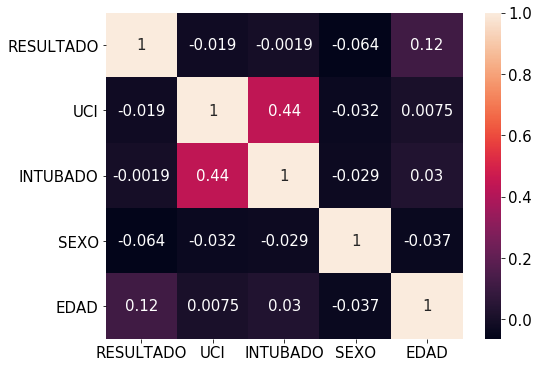

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df[["RESULTADO","UCI","INTUBADO","SEXO","EDAD"]].corr(), annot=True) 

# Conclusions of the analysis of COVID cases according to Age and Sex (fig1,fig2,fig3):

- It seems that there is not a significant difference between sex(fig1,fig2,fig3). 
- For both sex the COVID+ cases remain from 40 to 60(fig1).
- For both sex the COVID- cases remain from the 30 to 40 years old(fig2).
- There is a lightly higher proportion of COVID+ woman from 20 to 60, but from the age of 60 there is a higher proportion of COVID+ men (fig1).
- 60 seems to be a key age for men to be targeted by the COVID (fig1,fig2,fig3).
- In line with the distribution of COVID+/- test results, there is higher percentage of death woman dying from 30 to 60 years old, while from 60 there is an increase in the number of deaths in men(fig3).
- The correlation test show(fig4): 

    - The Sex is not well correlated with the test result or the hospital requirments.
    - As seemed in the previous statistics, the Age is more correlated with the test result, but the correlation is around 0.3.
    - What has a higher correlation(0.6) is the need of Intensive Care with the need of Artificial Respiratory Supports.

## 1.2  According to factor risks (fig5, fig6, fig7)

### Fig 5 and Fig6: Comparison of the proportion of total people and Total, COVID+ and dead people with  risk factors

In [7]:
df=df.replace(98,np.nan)
df["RESULTADO"]= df["RESULTADO"].replace(1,"POSITIVO")
df["RESULTADO"]= df["RESULTADO"].replace(0,"NEGATIVO")
df["RESULTADO"]= df["RESULTADO"].replace(3,"PENDIENTE")

In [8]:
ENFERMEDADES=df[['EPOC','NEUMONIA','DIABETES','ASMA','INMUSUPR','HIPERTENSION',
                'OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO']]
df['ENF'] = ENFERMEDADES.sum(axis=1)
#ENFERMEDADES

In [9]:
df1 = df['ENF'].value_counts()
df1
#df1 = pd.DataFrame(df1)
#df1

0.0     47579
1.0     27205
2.0     14222
3.0      6763
4.0      2837
5.0       990
6.0       302
7.0        90
8.0        23
10.0       15
9.0        13
11.0        2
Name: ENF, dtype: int64

In [10]:
df2 = df[(df["RESULTADO"].isin(["POSITIVO"]))]['ENF'].value_counts()
df2
#df2 = pd.DataFrame(df2)
#df2

0.0     9580
1.0     7092
2.0     4545
3.0     2344
4.0      931
5.0      295
6.0       85
7.0       17
10.0       6
9.0        5
8.0        3
11.0       2
Name: ENF, dtype: int64

In [11]:
df3 = df[df["FECHA_DEF"]!="9999-99-99"]["ENF"].value_counts().sort_values(ascending = False)
df3

2.0    1028
1.0     841
3.0     775
4.0     444
0.0     224
5.0     181
6.0      69
7.0      15
8.0       3
Name: ENF, dtype: int64

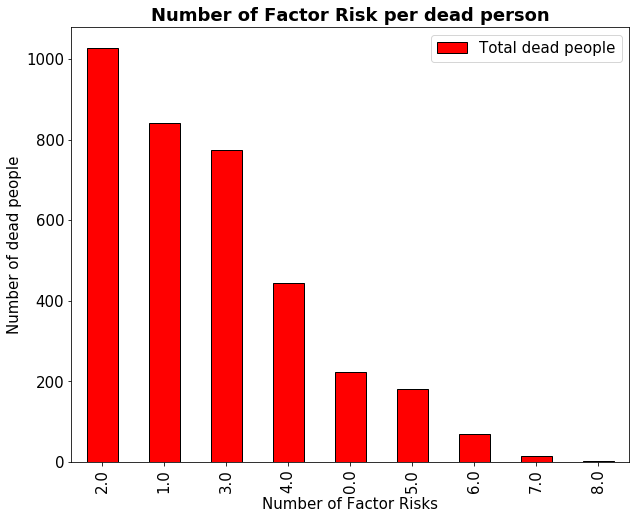

In [12]:
df3 = df[df["FECHA_DEF"]!="9999-99-99"]["ENF"].value_counts().sort_values(ascending = False)
df3
fig, ax = plt.subplots(figsize=(10,8))
plt.title('Number of Factor Risk per dead person',weight = "bold")  
plt.xlabel('Number of Factor Risks')  
plt.ylabel('Number of dead people')

df3.plot.bar(color = "red", edgecolor = "black", label = "Total dead people")
plt.legend()
plt.show()

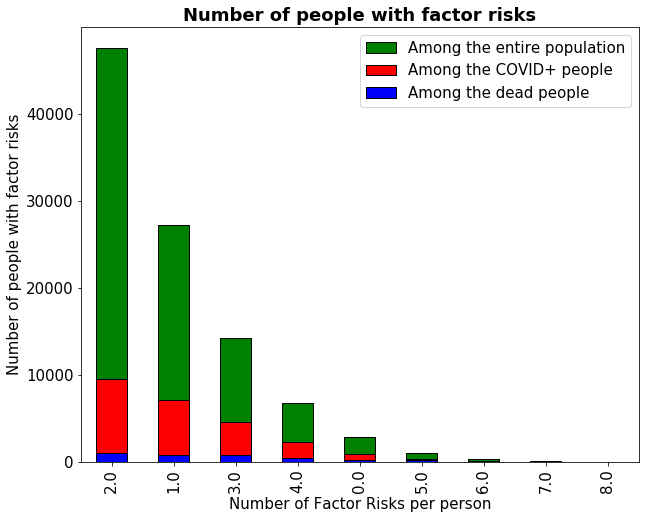

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title('Number of people with factor risks',weight = "bold")  
plt.xlabel('Number of Factor Risks per person')  
plt.ylabel('Number of people with factor risks')
df1.plot.bar(color = "green", edgecolor = "black", label = "Among the entire population")
df2.plot.bar(color = "red", edgecolor = "black", label = "Among the COVID+ people")
df3.plot.bar(color = "blue", edgecolor ="black", label = "Among the dead people")

plt.legend()
plt.show()

In [14]:
df4 = df[df["FECHA_DEF"]!="9999-99-99"]["CARDIOVASCULAR"].isin([1]).value_counts(True)[1]
df5 = df[df["FECHA_DEF"]!="9999-99-99"]["OBESIDAD"].isin([1]).value_counts(True)[1]
df6 = df[df["FECHA_DEF"]!="9999-99-99"]["RENAL_CRONICA"].isin([1]).value_counts(True)[1]
df7 = df[df["FECHA_DEF"]!="9999-99-99"]["HIPERTENSION"].isin([1]).value_counts(True)[1]
df8 = df[df["FECHA_DEF"]!="9999-99-99"]["DIABETES"].isin([1]).value_counts(True)[1]
df9 = df[df["FECHA_DEF"]!="9999-99-99"]["TABAQUISMO"].isin([1]).value_counts(True)[1]
df10 = df[df["FECHA_DEF"]!="9999-99-99"]["INMUSUPR"].isin([1]).value_counts(True)[1]
df11 = df[df["FECHA_DEF"]!="9999-99-99"]["ASMA"].isin([1]).value_counts(True)[1]
df12 = df[df["FECHA_DEF"]!="9999-99-99"]["EPOC"].isin([1]).value_counts(True)[1]


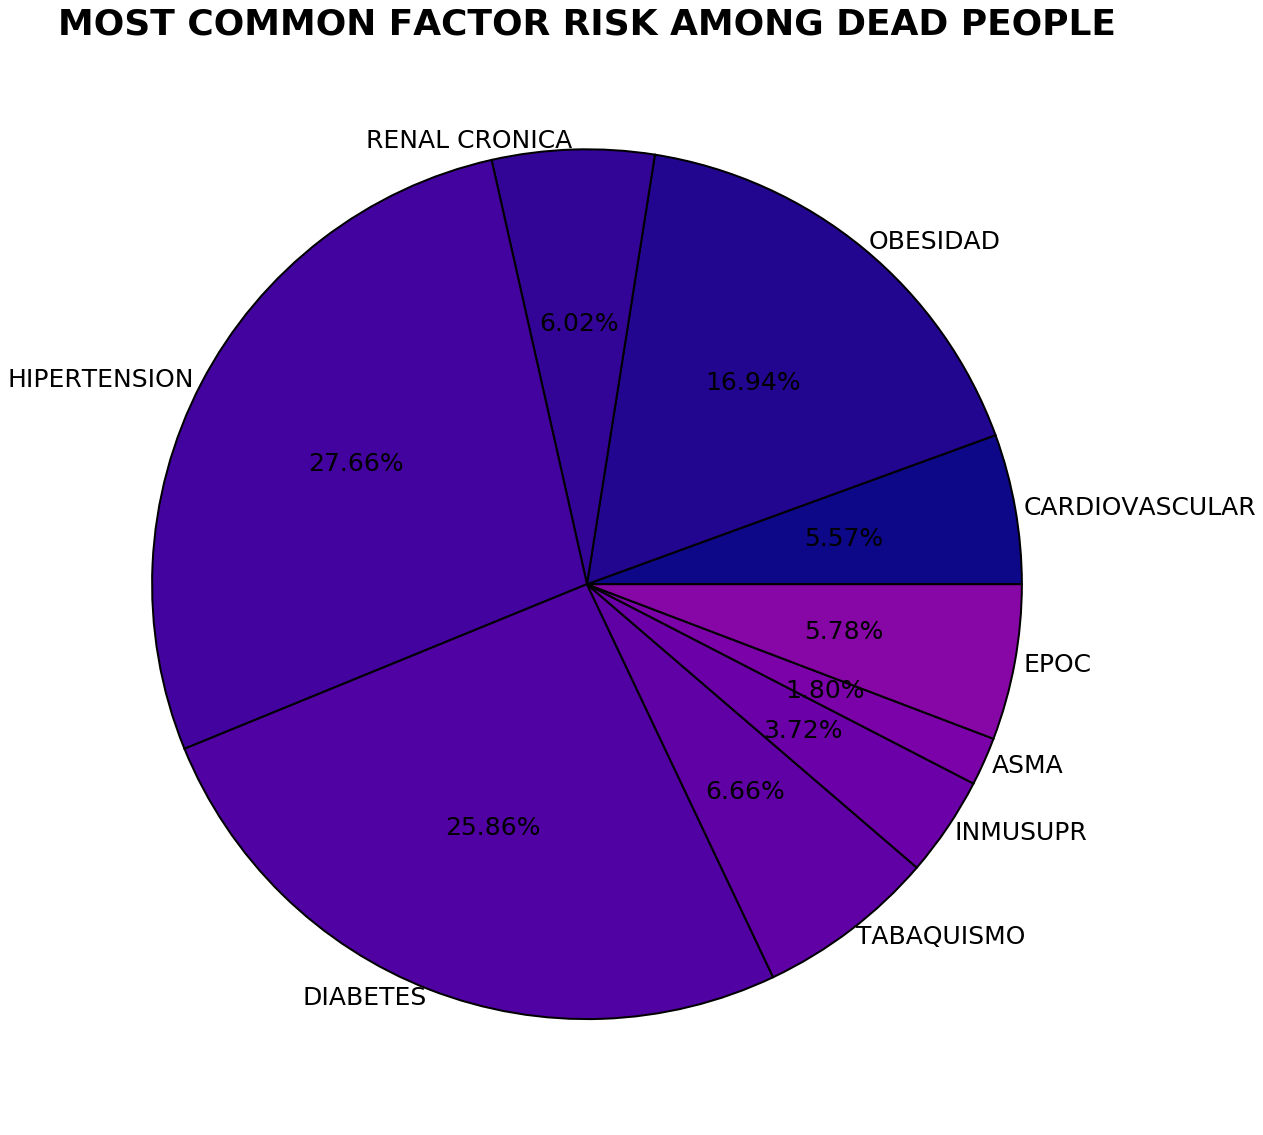

In [15]:
fig, ax = plt.subplots(figsize=(20,20))
factor_risk = ["CARDIOVASCULAR","OBESIDAD","RENAL CRONICA","HIPERTENSION","DIABETES","TABAQUISMO","INMUSUPR","ASMA","EPOC"]
dfs = [df4,df5,df6,df7,df8,df9,df10,df11,df12]

colores = plt.cm.plasma(np.linspace(0.,1.,30))
plt.rcParams.update({'font.size': 30})
plt.pie(dfs, labels = factor_risk ,labeldistance = 1.02,colors = colores,textprops=dict(color="black", size = 25),wedgeprops = {"edgecolor":"k",'linewidth': 2} ,shadow = False,autopct ='%1.2f%%') 
#ax.legend(factor_risk,title="Factor risk",loc="upper right",bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("MOST COMMON FACTOR RISK AMONG DEAD PEOPLE", weight= "bold")
 
plt.show()

### Fig 7. Number of people who required Artificial Respiratory Support 

In [16]:
df['INTUBADO'].value_counts()

0.0    24804
1.0     2001
Name: INTUBADO, dtype: int64

In [17]:
df["INTUBADO"]= df["INTUBADO"].replace(1,"YES")
df["INTUBADO"]= df["INTUBADO"].replace(0,"NO")

In [18]:
df[(df["INTUBADO"]=="YES") & (df["RESULTADO"].isin(["POSITIVO"]))]

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,ENF
0,04/05/2020,1ab4e5,0,3.0,25,0,25.0,25,6.0,0,...,1.0,0.0,0.0,0.0,POSITIVO,NaN,MÃ©xico,99,0.0,4.0
5,04/05/2020,1448c7,0,3.0,25,0,NaN,25,6.0,0,...,0.0,0.0,0.0,0.0,POSITIVO,0.0,Estados Unidos de AmÃ©rica,99,0.0,1.0
35,04/05/2020,144da4,0,3.0,25,1,25.0,25,6.0,0,...,1.0,0.0,0.0,0.0,POSITIVO,NaN,MÃ©xico,99,1.0,2.0
42,04/05/2020,12aaed,0,3.0,25,1,25.0,25,6.0,0,...,1.0,0.0,0.0,NaN,POSITIVO,NaN,MÃ©xico,99,0.0,5.0
84,04/05/2020,0bf23b,0,3.0,25,0,25.0,25,6.0,0,...,0.0,0.0,1.0,0.0,POSITIVO,NaN,MÃ©xico,99,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25157,04/05/2020,14dbc5,1,13.0,21,1,15.0,21,114.0,0,...,0.0,0.0,0.0,0.0,POSITIVO,NaN,MÃ©xico,99,0.0,2.0
25264,04/05/2020,0683fa,1,12.0,29,1,29.0,29,5.0,0,...,0.0,0.0,0.0,0.0,POSITIVO,NaN,MÃ©xico,99,0.0,1.0
25751,04/05/2020,088dc1,1,12.0,30,0,30.0,30,193.0,0,...,0.0,0.0,0.0,0.0,POSITIVO,NaN,MÃ©xico,99,1.0,2.0
25812,04/05/2020,1b43d6,1,13.0,21,1,21.0,21,114.0,0,...,0.0,1.0,0.0,0.0,POSITIVO,NaN,MÃ©xico,99,0.0,4.0


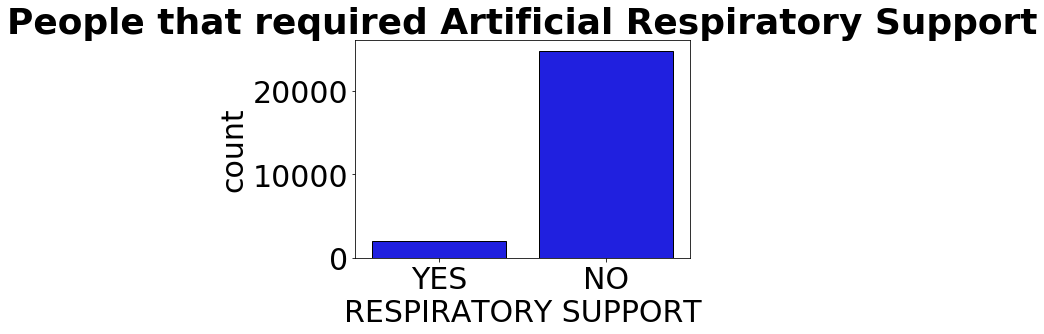

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(df['INTUBADO'], color = "blue"  ,edgecolor="black")

plt.title('People that required Artificial Respiratory Support', weight= 'bold')
plt.xlabel('RESPIRATORY SUPPORT')
plt.show()

#### CONCLUSION : 
- 2001 people required Artificial Respiratory Support and from them, only 1032 where COVID+

# Conclusions of the analysis of COVID cases according to factor risks:
- 7092 people with at least one factor risk gave a positive result and 16383 gave negative result
- There is 9580 people who got a positive result without manifesting any risk factor and 32080 who got a negative result without any risk factor. Probably other factors more than the above mentioned may play a role in the posibility of having a higher risk to be infected by COVID.

# 2. Analysis of the outcome and dangers of COVID (fig7, fig8, fig9)

### Fig 7: Number of deaths and deaths evolution

In [20]:
#df["FECHA_DEF"].value_counts()
df["FECHA_DEF"]= df["FECHA_DEF"].replace("9999-99-99",np.nan)

In [21]:
muertes = df["FECHA_DEF"].value_counts()
total_muert = muertes.cumsum()
print (total_muert[-1], "death people in total on the date 25/04/2020")

3580 death people in total on the date 25/04/2020


In [22]:
total_muert.sort_values(ascending = False)

10/02/2020    3580
17/03/2020    3579
09/03/2020    3578
23/02/2020    3577
04/03/2020    3576
29/01/2020    3575
19/03/2020    3574
20/03/2020    3573
15/01/2020    3572
16/03/2020    3571
23/03/2020    3569
22/03/2020    3567
18/03/2020    3564
25/03/2020    3561
24/03/2020    3557
04/05/2020    3552
26/03/2020    3545
27/03/2020    3528
29/03/2020    3508
28/03/2020    3484
30/03/2020    3459
01/04/2020    3421
03/05/2020    3378
05/04/2020    3331
03/04/2020    3280
02/04/2020    3229
31/03/2020    3178
04/04/2020    3123
08/04/2020    3066
06/04/2020    2994
09/04/2020    2919
01/05/2020    2833
30/04/2020    2745
02/05/2020    2653
07/04/2020    2557
13/04/2020    2461
12/04/2020    2364
11/04/2020    2266
17/04/2020    2165
18/04/2020    2063
10/04/2020    1958
16/04/2020    1851
15/04/2020    1742
14/04/2020    1632
29/04/2020    1517
28/04/2020    1396
27/04/2020    1273
20/04/2020    1145
19/04/2020    1013
22/04/2020     880
23/04/2020     745
24/04/2020     606
21/04/2020  

In [23]:
#fig, ax = plt.subplots(figsize=(10,8))
#muertes.plot(color='blue',rot=45)

#plt.title('Evolution of death rate',weight = "bold")
#plt.xlabel('Date')  
#plt.ylabel('Number of deaths')
#plt.savefig("Evolution of death rate.jpg")
#plt.show()

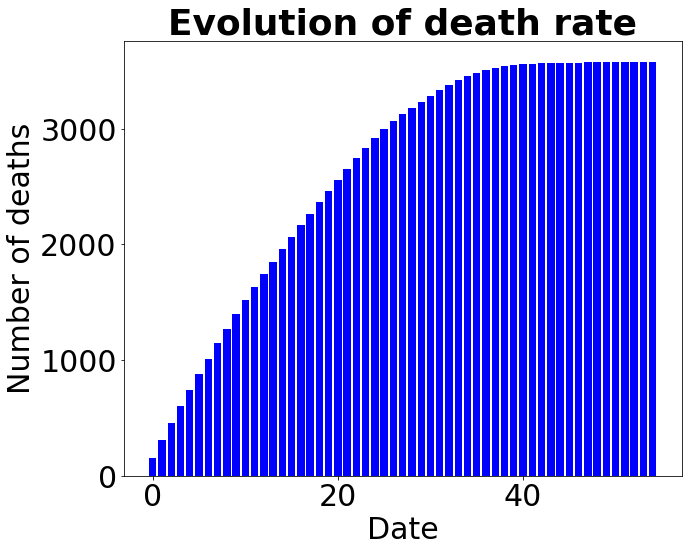

In [24]:
fig, ax = plt.subplots(figsize=(10,8))

plt.bar(range(len(total_muert)),total_muert,color="b")
plt.title('Evolution of death rate',weight = "bold")
plt.xlabel('Date')  
plt.ylabel('Number of deaths')

plt.savefig("Total death accumulation.jpg")
plt.show()

In [25]:
#df['FECHA_DEF']= pd.to_datetime(df['FECHA_DEF'].astype(str), format='%Y/%m/%d')
#df[df['FECHA_DEF']!= np.datetime64('NaT')]['FECHA_DEF']

In [26]:
df["FECHA_DEF"]= df["FECHA_DEF"].replace("9999-99-99",np.nan)
df['FECHA_DEF']= pd.to_datetime(df['FECHA_DEF'].astype(str), format='%d/%m/%Y')
df[df['FECHA_DEF']!= np.datetime64('NaT')]['FECHA_DEF']

0        2020-04-10
1               NaT
2               NaT
3               NaT
4        2020-04-14
            ...    
100036          NaT
100037          NaT
100038          NaT
100039          NaT
100040          NaT
Name: FECHA_DEF, Length: 100041, dtype: datetime64[ns]

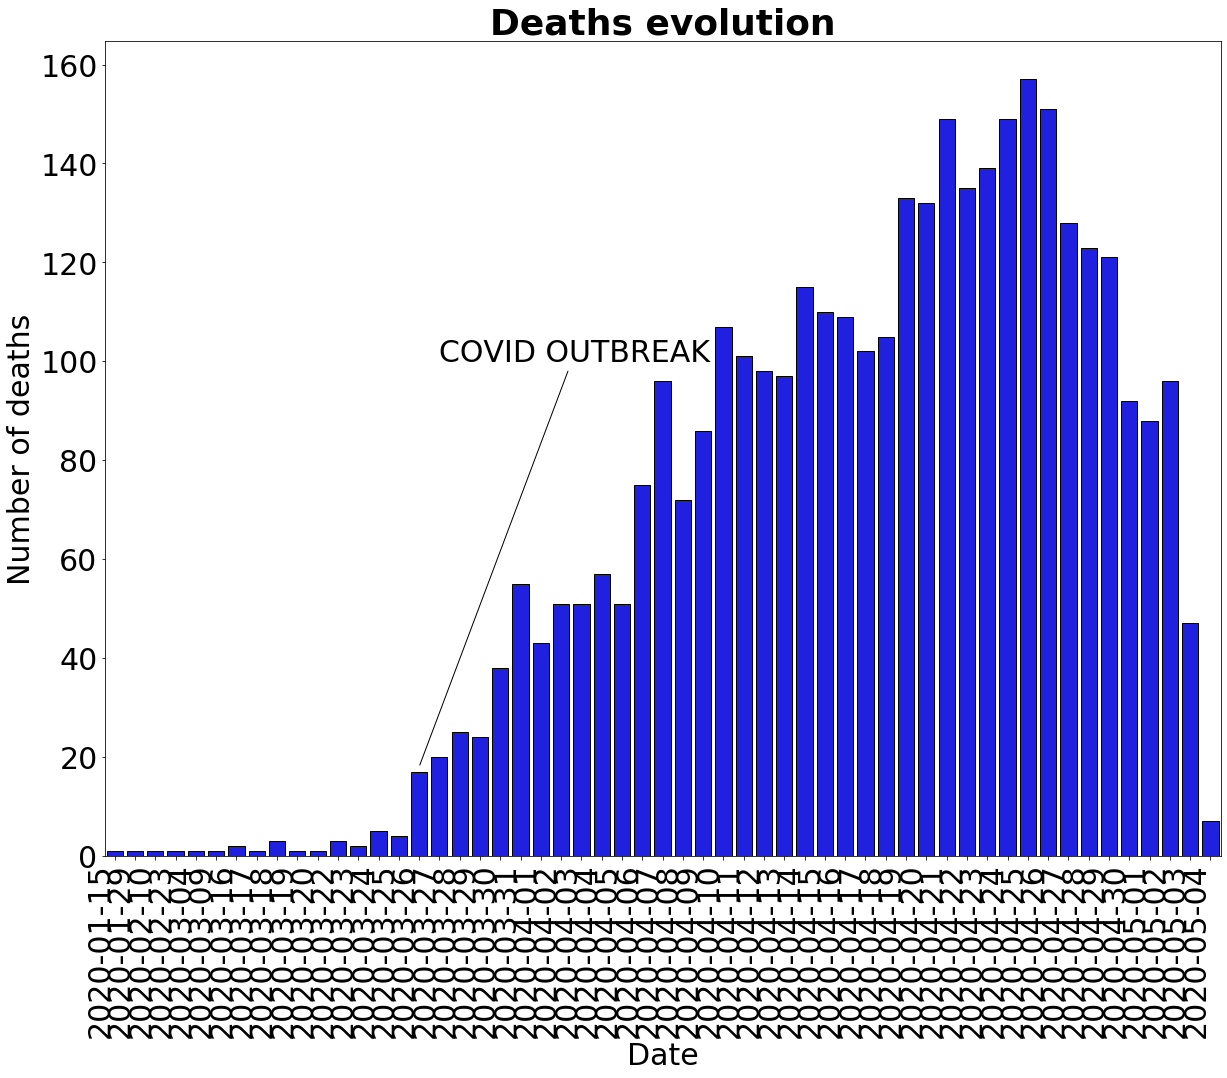

In [27]:
fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(df['FECHA_DEF'], color = "blue",edgecolor="black")

plt.title('Deaths evolution',weight = "bold")  
plt.xlabel('Date')  
plt.ylabel('Number of deaths')
plt.annotate(xy =(15,18),xytext = (16,100), s = "COVID OUTBREAK", arrowprops = dict(arrowstyle ="-"))
x_dates = df["FECHA_DEF"].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.savefig("Deaths evolution.jpg")


plt.xticks(rotation=90)
plt.show() 

#### CONCLUSION: In Mexico there is a sharp increase in deaths from the 26th of March. Probably, in agreement with the start of the outbreak in Mexico. Then, the start of the outbreak in Mexico can be stablished the 26/03/2020. There has been a total acumulation of deaths of  3580 as to the 4th of May of 2020.

## 8: Mean time passed between the arousal of the first symptoms and  death

In [28]:
from datetime import datetime
from datetime import date 
import time
import datetime
from datetime import date, timedelta

In [29]:
df["FECHA_DEF"]= df["FECHA_DEF"].replace("9999-99-99",np.nan)
df['FECHA_DEF']= pd.to_datetime(df['FECHA_DEF'].astype(str), format='%Y/%m/%d')
df[df['FECHA_DEF']!= np.datetime64('NaT')]['FECHA_DEF']

0        2020-04-10
1               NaT
2               NaT
3               NaT
4        2020-04-14
            ...    
100036          NaT
100037          NaT
100038          NaT
100039          NaT
100040          NaT
Name: FECHA_DEF, Length: 100041, dtype: datetime64[ns]

In [30]:
df["FECHA_DEF"]= df["FECHA_DEF"].replace("9999-99-99",np.nan)
df['FECHA_DEF']=pd.to_datetime(df['FECHA_DEF'].astype(str), format='%Y/%m/%d')
df["FECHA_SINTOMAS"]= df["FECHA_SINTOMAS"].replace("9999-99-99",np.nan)
df['FECHA_SINTOMAS']= pd.to_datetime(df['FECHA_SINTOMAS'].astype(str), format='%d/%m/%Y')

In [31]:
dt2 = df["FECHA_SINTOMAS"]
dt1 = df["FECHA_DEF"]
timedelta = dt1 - dt2
timedelta_list = (list(timedelta))
#timedelta_list
#print("Segundos", timedelta.days * 24 * 3600 + timedelta.seconds)
timedelta.mean()

Timedelta('9 days 01:41:21.787709')

#### CONCLUSION: The mean time between having the first symptoms and death is around 9 days 

# Conclusions of the analysis of the outcome of COVID:
- The COVID outbreak seems to have start the 26th of March in Mexico (fig 7).
- There has been a total acumulation of deaths of 100041 as to the 4th of May of 2020 (fig 7).
- The mean time between having the first symptoms and death is around 9 days.

# 3. Geographical distribution of the COVID+ results in Mexico (fig10, fig11)

## 3.1.  Distribution of the cities per state with the highest number of positive cases (fig10)

In [32]:
#Cargar datos
dfm = pd.read_csv("CoordMunicipios.csv", encoding = "ISO-8859-1")
dfe = pd.read_csv("CoordEstados.csv", encoding = "ISO-8859-1")
df = pd.read_csv("200504COVID19MEXICO.csv", encoding = "ISO-8859-1")
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,04/05/2020,1ab4e5,2,3,25,2,25,25,6,2,...,2,1,2,2,2,1,99,MÃ©xico,99,2
1,04/05/2020,0cc140,2,3,15,1,28,15,20,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,04/05/2020,0e0689,2,3,27,1,27,27,4,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
3,04/05/2020,1b81dc,2,3,2,1,8,2,4,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
4,04/05/2020,0b7b4d,2,3,27,2,27,27,3,2,...,2,1,1,2,2,1,99,MÃ©xico,99,2


In [33]:
df=df.replace(98,np.nan)
df=df.replace(99,np.nan)
df=df.replace(97,np.nan)
df=df.replace(2,0)
df=df.replace(3,np.nan)

In [34]:
df = df.rename(columns={"ENTIDAD_RES":"Clave Estado", "MUNICIPIO_RES":"Clave Municipio"})
df = pd.merge(dfm,df,on=["Clave Estado", "Clave Municipio"])

In [35]:
df_pos=df[df["RESULTADO"]==1]
df_pos=df_pos.groupby(["Estado","Municipio"],as_index=False).count().iloc[:,0:3]
df_pos.head()

lista_unicos=df_pos["Estado"].unique()
for i in lista_unicos:
    print(df_pos[df_pos["Estado"]==i].max())

Estado          Aguascalientes
Municipio             Tepezalá
Clave Estado               233
dtype: object
Estado          Campeche
Municipio         Tenabo
Clave Estado          10
dtype: object
Estado          Chiapas
Municipio       Yajalón
Clave Estado         69
dtype: object
Estado           Chihuahua
Municipio       Temósachic
Clave Estado           340
dtype: object
Estado          Ciudad De México
Municipio         Álvaro Obregón
Clave Estado                1262
dtype: object
Estado          Coahuila De Zaragoza
Municipio                    Torreón
Clave Estado                     222
dtype: object
Estado                    Colima
Municipio       Villa De Álvarez
Clave Estado                  17
dtype: object
Estado             Durango
Municipio       Tlahualilo
Clave Estado            28
dtype: object
Estado          Estado De México
Municipio               Zumpango
Clave Estado                 561
dtype: object
Estado          Guanajuato
Municipio          Yuriria
Clave Esta

In [36]:
df_pos=df[df["RESULTADO"]==1]
df_pos=df_pos.groupby(["Estado","Municipio"],as_index=False).count().iloc[:,0:3]
lista_unicos=df_pos["Estado"].unique()
lista_mun=[]
lista_values=[]
for i in lista_unicos:
    lista_mun.append(df_pos[df_pos["Estado"]==i].max()[1])
    lista_values.append(df_pos[df_pos["Estado"]==i].max()[2])
df_max=pd.DataFrame(columns=["Estado","Municipio","Positivos"])
df_max["Estado"]=lista_unicos
df_max["Municipio"]=lista_mun
df_max["Positivos"]=lista_values
#df_max

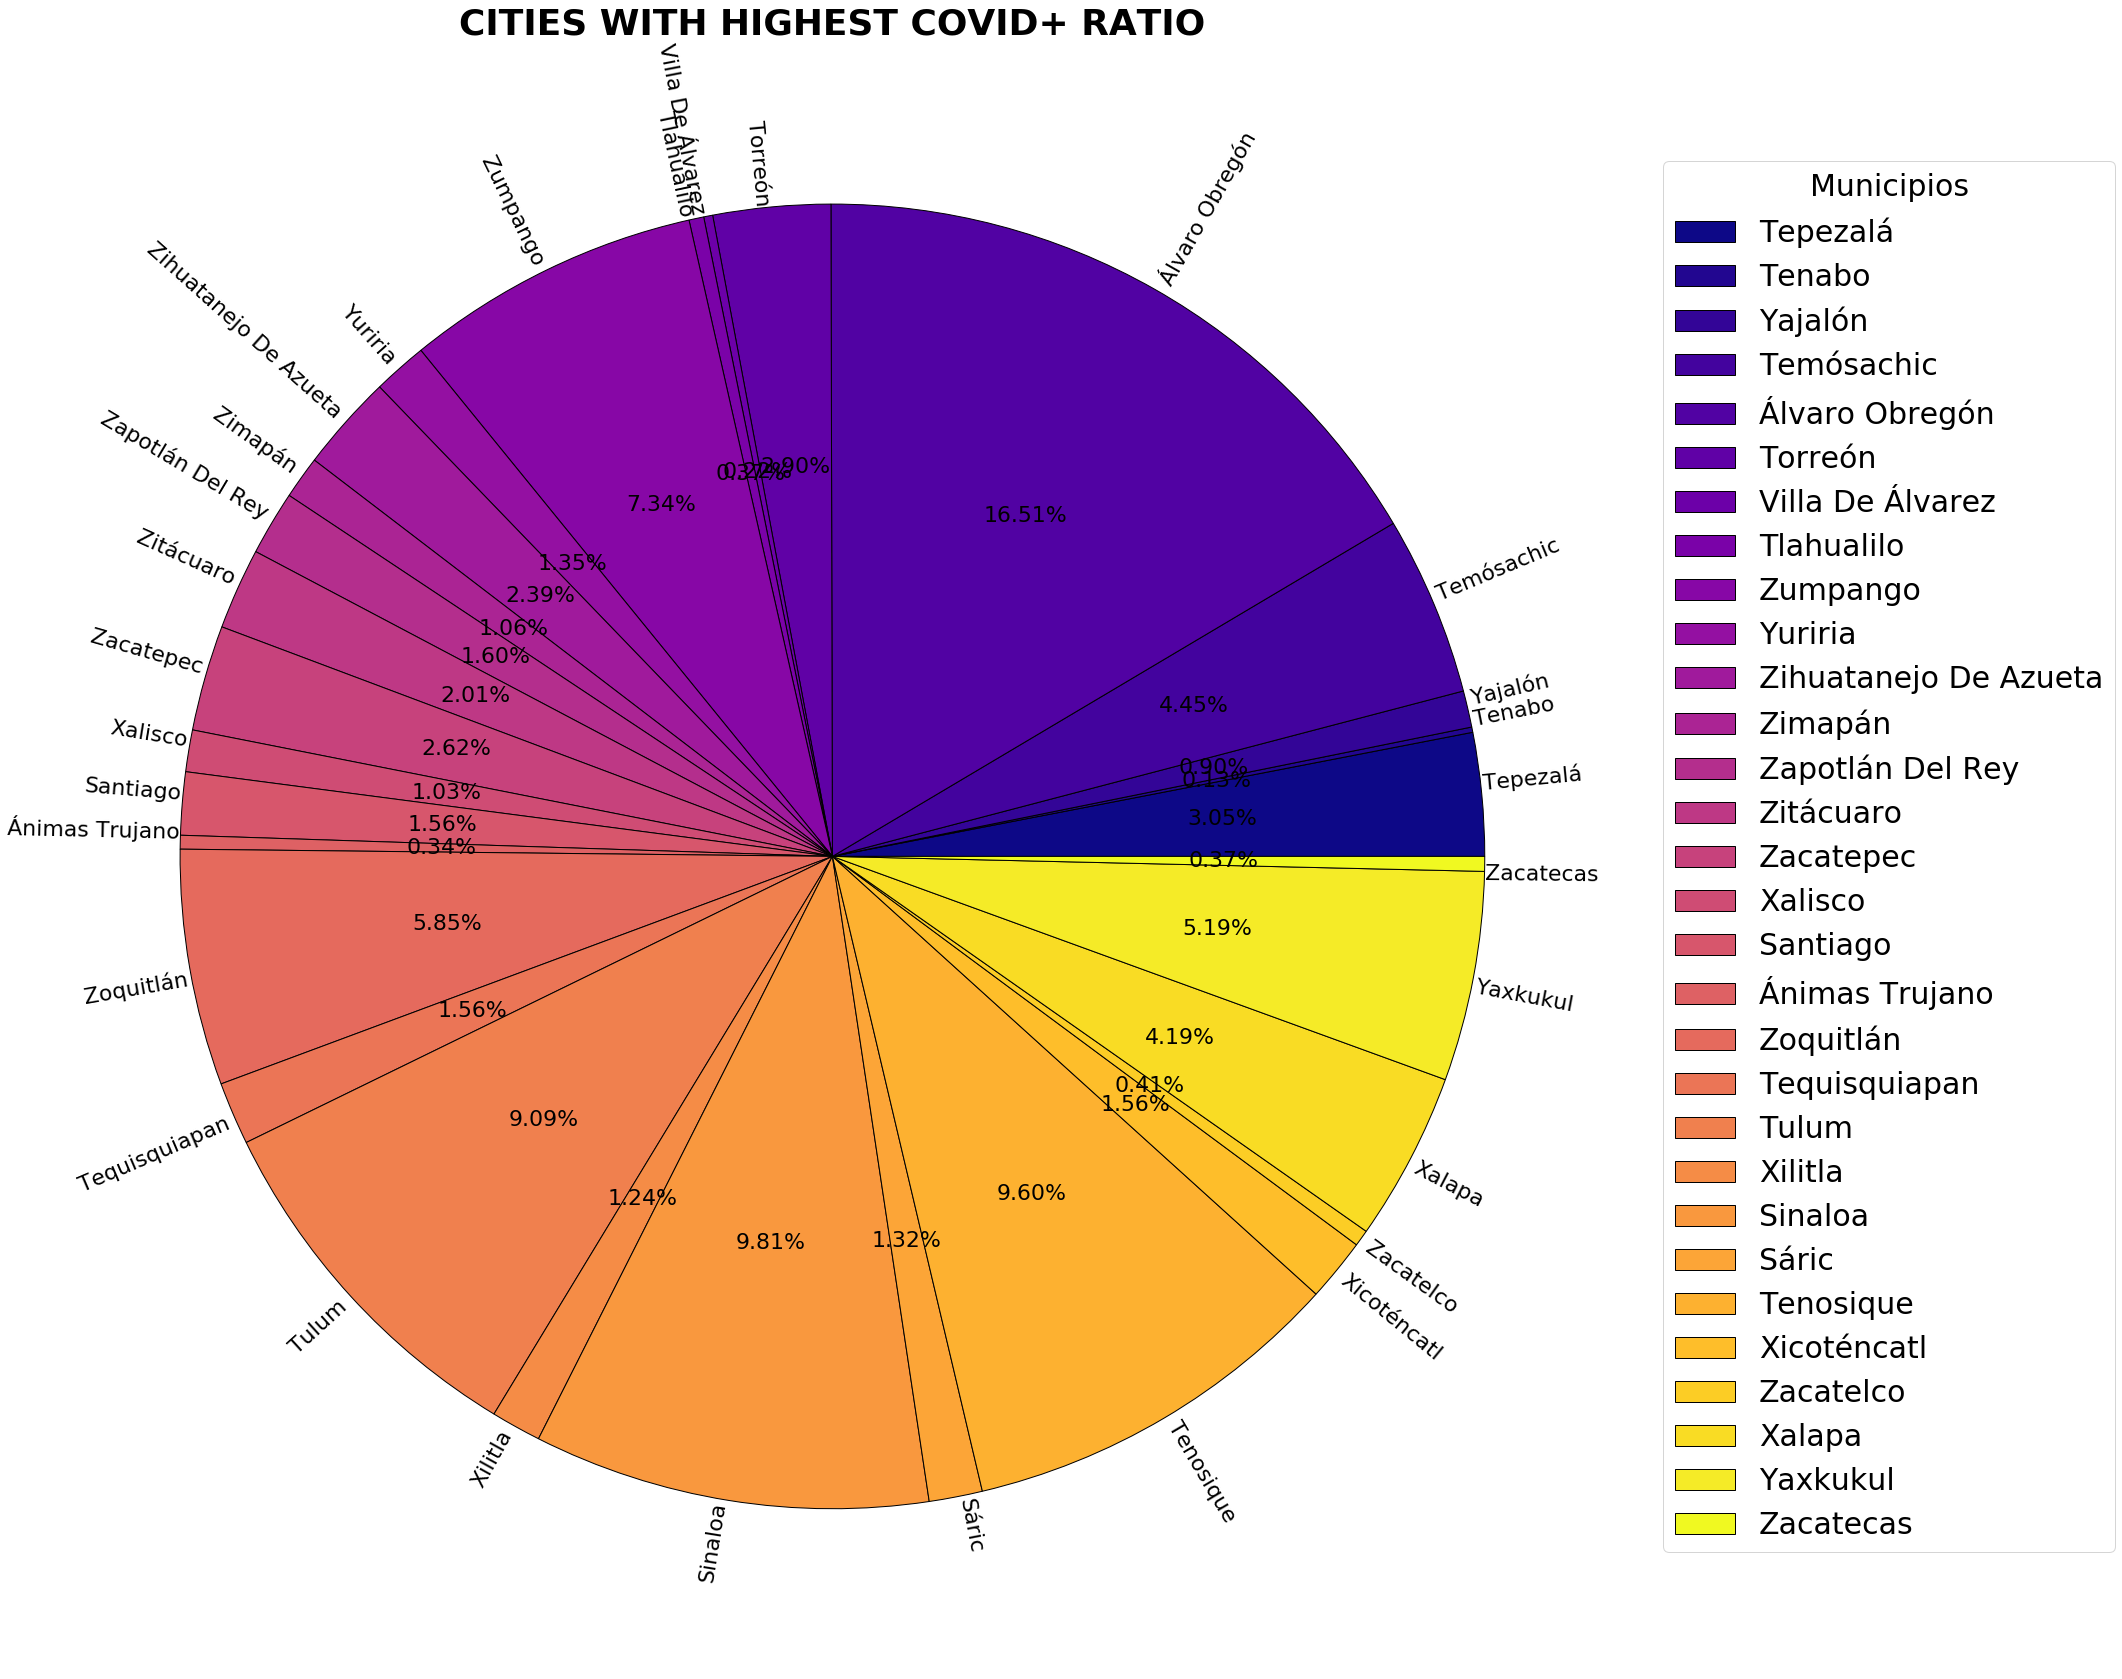

In [37]:
fig, ax = plt.subplots(figsize=(30,30))
municipios = lista_mun
positivos = lista_values  

plt.rcParams.update({'font.size': 30})
colores = plt.cm.plasma(np.linspace(0.,1.,30))
plt.pie( positivos ,labels = municipios,labeldistance = 1.0,rotatelabels = 270,colors = colores,textprops=dict(color="black", size = 22),wedgeprops = {"edgecolor":"k",'linewidth': 1},shadow = False,autopct ='%1.2f%%') 
ax.legend(municipios,title="Municipios",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))


ax.set_title("CITIES WITH HIGHEST COVID+ RATIO", weight = "bold")
plt.show()

## 3.2.  Distribution of the cities per state with the lowest number of positive cases (fig11)

In [38]:
df_pos = df[df["RESULTADO"]==1]
df_pos = df_pos.groupby(["Estado","Municipio"],as_index=False).count().iloc[:,0:3]
lista_unicos=df_pos["Estado"].unique()
lista_mun=[]
lista_values=[]
for i in lista_unicos:
    lista_mun.append(df_pos[df_pos["Estado"]==i].min()[1])
    lista_values.append(df_pos[df_pos["Estado"]==i].min()[2])
df_min=pd.DataFrame(columns=["Estado","Municipio","Positivos"])
df_min["Estado"]=lista_unicos
df_min["Municipio"]=lista_mun
df_min["Positivos"]=lista_values
#df_min

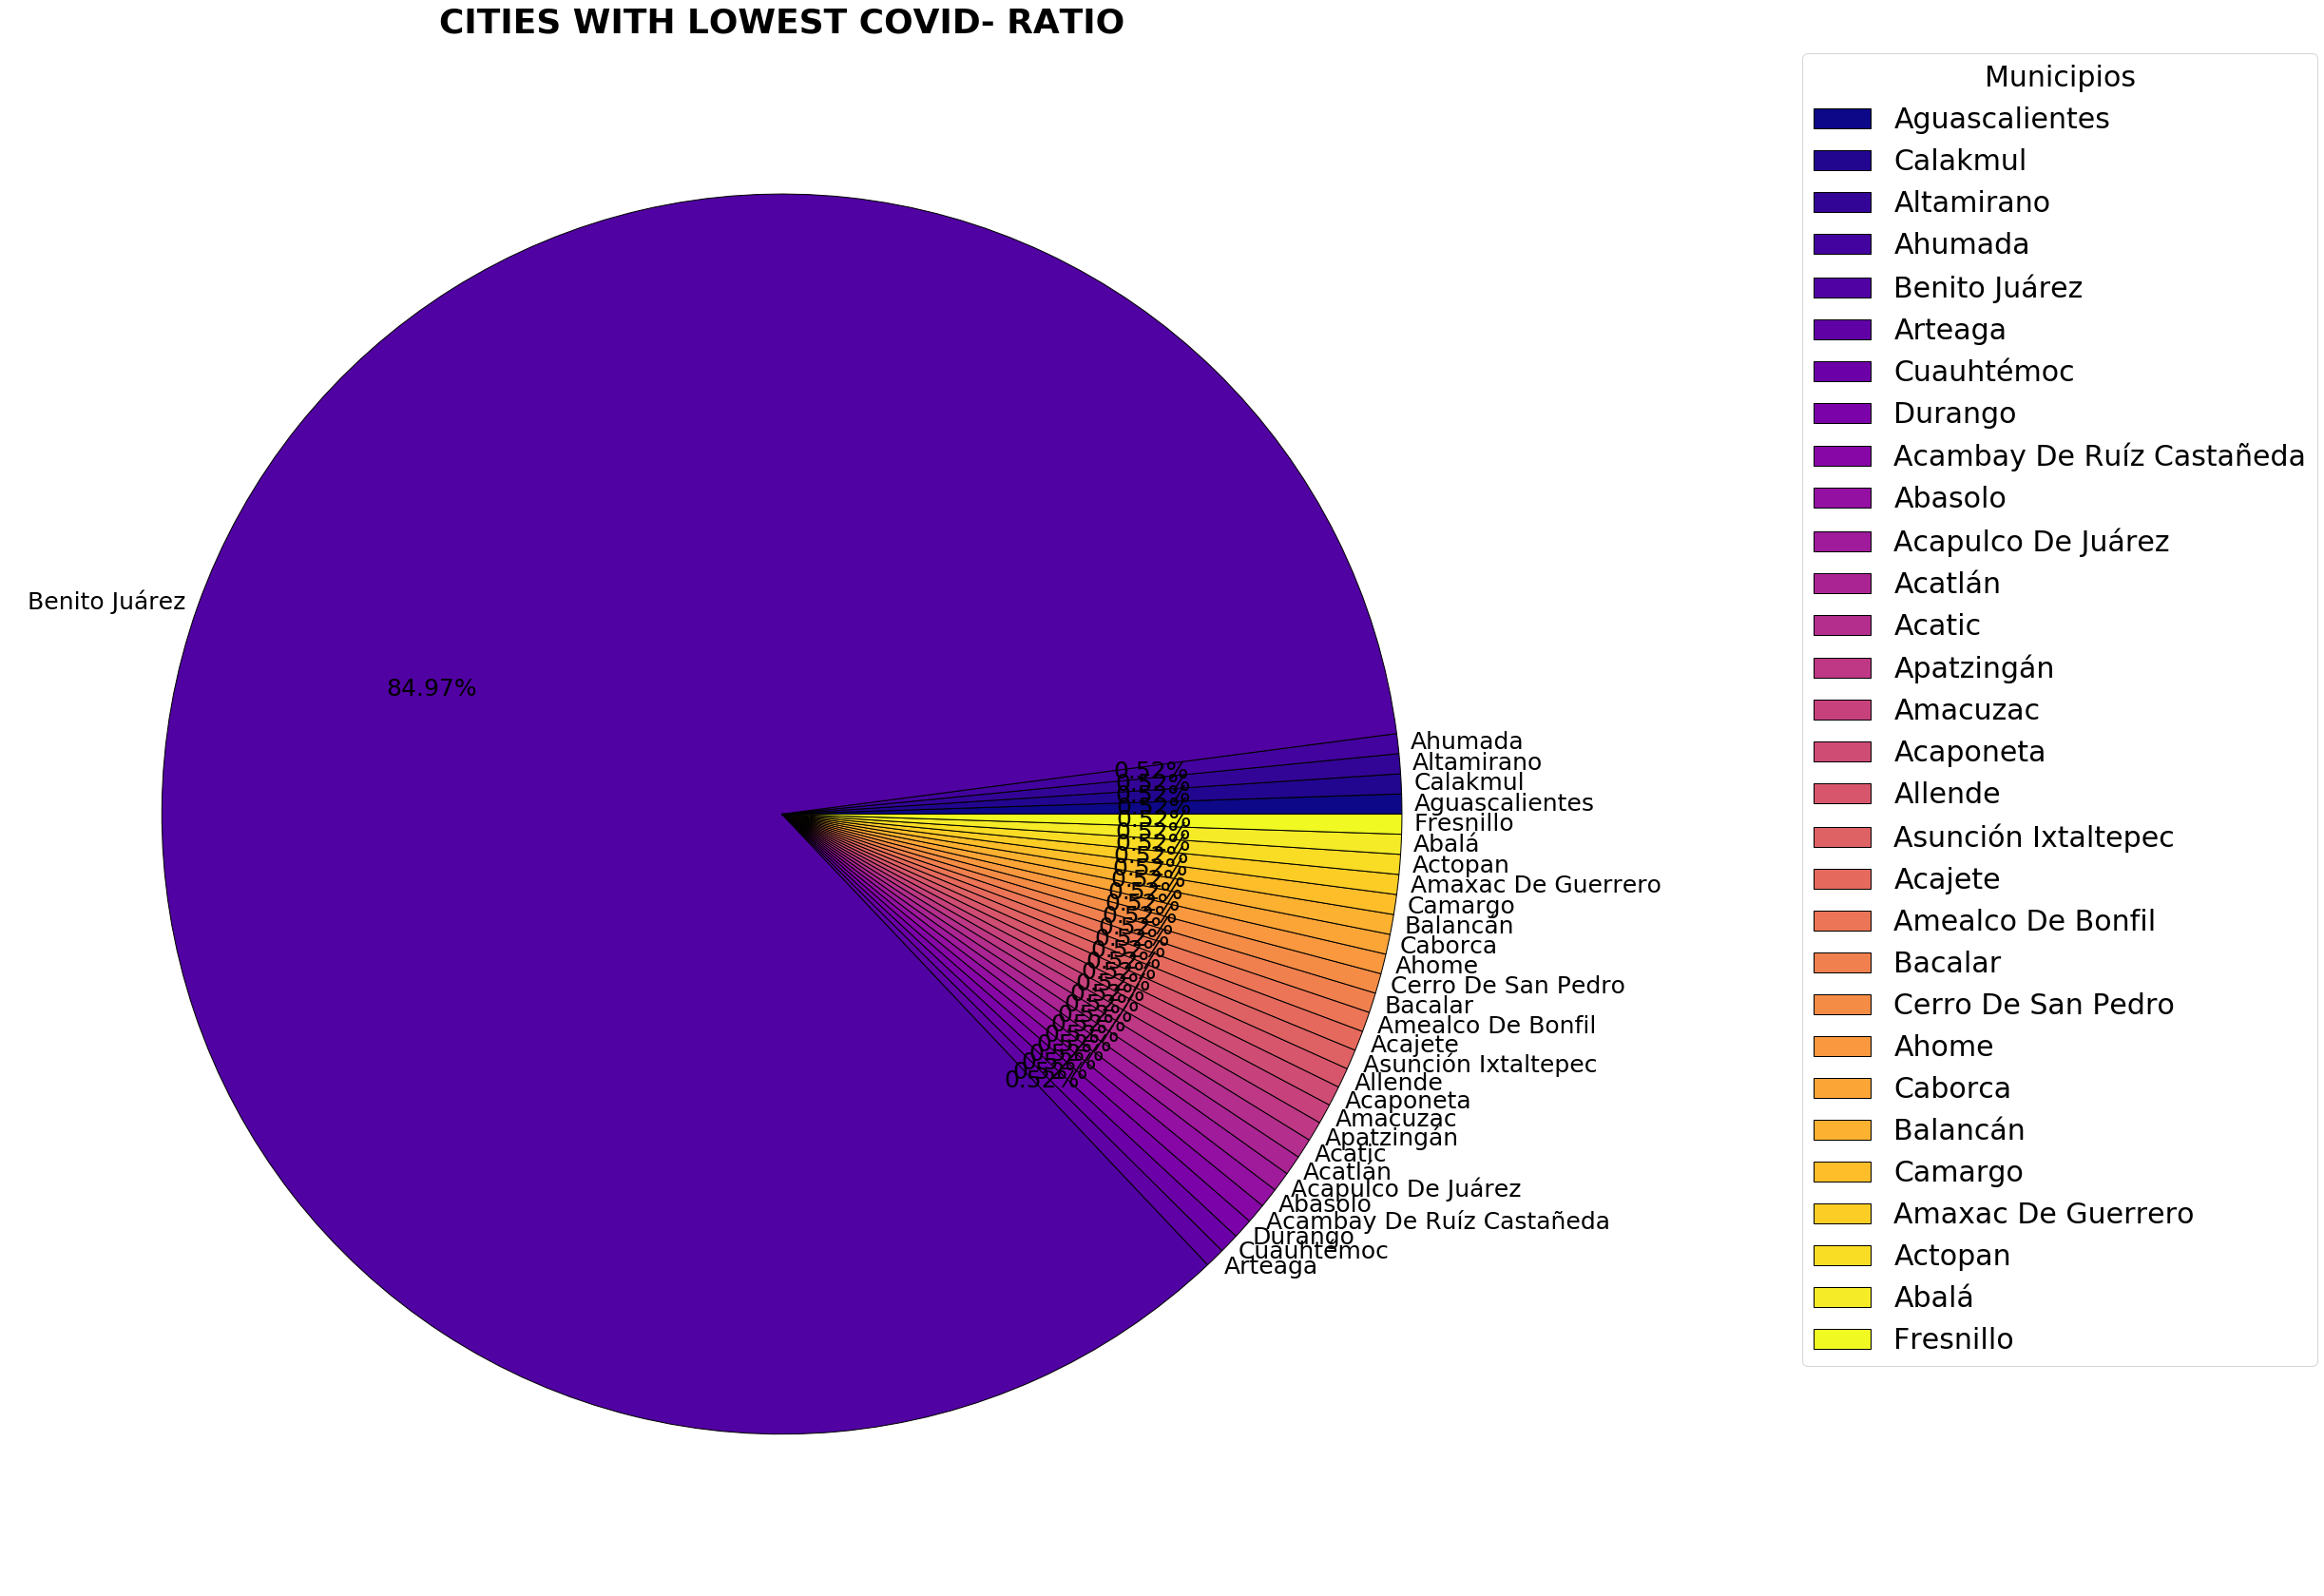

In [39]:
fig, ax = plt.subplots(figsize=(30,30))
municipios = lista_mun
negativos  = lista_values  

colores = plt.cm.plasma(np.linspace(0.,1.,30))
plt.rcParams.update({'font.size': 30})
plt.pie(negativos, labels = municipios,labeldistance = 1.02,colors = colores,textprops=dict(color="black", size = 25),wedgeprops = {"edgecolor":"k",'linewidth': 1} ,shadow = False,autopct ='%1.2f%%') 
ax.legend(municipios,title="Municipios",loc="upper right",bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("CITIES WITH LOWEST COVID- RATIO", weight= "bold")
 
plt.show()

# Conclusions of the geographical distribution of COVID:
- From all Mexico the least affected city is Benito Juarez (85% of its population was not affected) with a huge difference with the rest of less infected cities (only having a 0.52% of their population not affected).
- Benito Juarez can be ranked as the savest mexican city from COVID outbreak and Alvaro Obregon as the most dangerous.

# 3.  Maps: 

## 3.1 Visualization of COVID+ patients by state 

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm

In [41]:
#Cargar datos
dfm = pd.read_csv("CoordMunicipios.csv", encoding = "ISO-8859-1")
dfe = pd.read_csv("CoordEstados.csv", encoding = "ISO-8859-1")
df = pd.read_csv("200504COVID19MEXICO.csv", encoding = "ISO-8859-1")
df = df.rename(columns={"ENTIDAD_RES":"Clave Estado", "MUNICIPIO_RES":"Clave Municipio"})

In [42]:
df_pos=df[df["RESULTADO"]==1]
df_pos=df_pos.groupby(["Clave Estado"],as_index=False).count().iloc[:,0:4]

In [43]:
df = pd.merge(dfe,df_pos,on=["Clave Estado"])

In [44]:
import folium
#mexico_map = folium.Map(location=[23.634501, -102.552784], zoom_start=5)
#mexico_map
latitude = 23.634501
longitude = -102.552784

In [45]:
from folium import plugins

# Comenzamos de nuevo con una copia limpia del mapa de San Francisco
mexico_map = folium.Map(location = [latitude, longitude], zoom_start = 5)

# Creamos una instancia de un objeto de clúster (mark cluster object)
#de marca para los incidentes en el marco de datos
positivos = plugins.MarkerCluster().add_to(mexico_map)

#Recorre los 100 crímenes y agrega a cada uno al feature group de incidentes
for lat, lng, label, in zip(df.Latitud, df.Longitud, df.ID_REGISTRO):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(positivos)

mexico_map

## 3.2 Visualization of deaths rate by state

In [46]:
json_estados=['Baja California','Baja California Sur','Coahuila De Zaragoza','Chihuahua','Durango','Sinaloa','Sonora',
             'Zacatecas','Nuevo Leon','San Luis Potosi','Tamaulipas','Aguascalientes','Colima','Jalisco','Michoacan De Ocampo',
             'Nayarit','Campeche','Oaxaca','Puebla','Tabasco','Tlaxcala','CDMX','Guanajuato','Guerrero','Hidalgo','Estado De Mexico',
             'Morelos','Queretaro','Veracruz De Ignacio De La Llave','Chiapas','Quintana Roo','Yucatan']
json_estados.sort()


In [47]:
df=df.replace("Ciudad De México",'CDMX')
df=df.replace("Querétaro",'Queretaro')
df=df.replace("Estado De México","Estado De Mexico")
df=df.replace("Yucatán","Yucatan")
df=df.replace("Michoacán De Ocampo","Michoacan De Ocampo")
df=df.replace("San Luis Potosí","San Luis Potosi")
df=df.replace("Nuevo León","Nuevo Leon")

In [48]:
mexico_geo =  r'mexico.json'
latitude=23.634501
longitude=-102.552784
mexico_map = folium.Map(location=[latitude, longitude], zoom_start=5)
#Generar un choropleth map utilizando la inmigración total de cada país a Canadá desde 1980 hasta 2013
mexico_map = folium.Map(location=[latitude, longitude], zoom_start=5)
mexico_map
mexico_map.choropleth(
    geo_data=mexico_geo,
    #threshold_scale=[0,100,200,300,500,1000,3000,7000],
    data=df,
    columns=['Estado','FECHA_ACTUALIZACION'],
    key_on='feature.properties.name',
     fill_color='Reds',
     fill_opacity=0.7,
     line_opacity=0.2,
     legend_name='COVID+ patients',
)
mexico_map


C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Clave Estado         32 non-null     int64 
 1   Estado               32 non-null     object
 2   Latitud              32 non-null     object
 3   Longitud             32 non-null     object
 4   Error                32 non-null     object
 5   FECHA_ACTUALIZACION  32 non-null     int64 
 6   ID_REGISTRO          32 non-null     int64 
 7   ORIGEN               32 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 2.2+ KB
